In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
#Import dataset
dataset = pd.read_csv("~/Documents/Python/carbon-emissions-EDA/emissions.csv")
df = dataset.copy()

In [67]:
df.head()

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,0.91250,Million bbl/yr,0.363885
1,1962,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,1.84325,Bcf/yr,0.134355
2,1963,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,1.82500,Million bbl/yr,0.727770
3,1963,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,4.42380,Bcf/yr,0.322453
4,1964,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,7.30000,Million bbl/yr,2.911079


In [68]:
df.describe()

,year,production_value,total_emissions_MtCO2e
count,12551.000000,12551.000000,12551.000000
mean,1987.148116,412.712258,113.219734
std,29.202455,1357.569683,329.812666
min,1854.000000,0.004398,0.000321
25%,1973.000000,10.601353,8.785294
50%,1994.000000,63.203536,33.058688
75%,2009.000000,320.664764,102.154596
max,2022.000000,27192.000000,8646.905949


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    12551 non-null  int64  
 1   parent_entity           12551 non-null  object 
 2   parent_type             12551 non-null  object 
 3   commodity               12551 non-null  object 
 4   production_value        12551 non-null  float64
 5   production_unit         12551 non-null  object 
 6   total_emissions_MtCO2e  12551 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 686.5+ KB


In [70]:
df.columns

Index(['year', 'parent_entity', 'parent_type', 'commodity', 'production_value',
       'production_unit', 'total_emissions_MtCO2e'],
      dtype='object')

## Cleaning the data

In [71]:
missing_values = df.isna().sum()
missing_values

year                      0
parent_entity             0
parent_type               0
commodity                 0
production_value          0
production_unit           0
total_emissions_MtCO2e    0
dtype: int64

In [72]:
duplicated_values = df.duplicated().sum()
duplicated_values

np.int64(0)

## Analysis

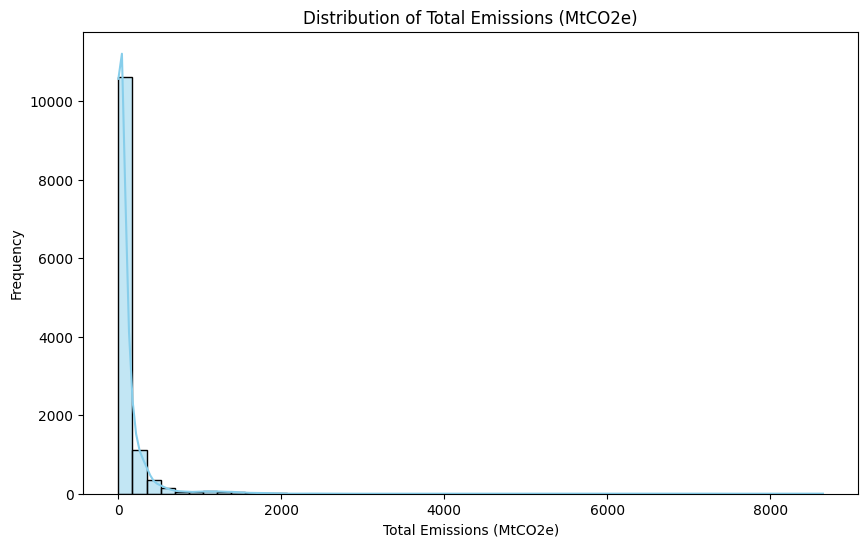

In [73]:
# Distribution of total emissions
plt.figure(figsize = (10, 6))
sns.histplot(df['total_emissions_MtCO2e'], 
             bins = 50, 
             kde = True, 
             color = 'skyblue')
plt.title('Distribution of Total Emissions (MtCO2e)')
plt.xlabel('Total Emissions (MtCO2e)')
plt.ylabel('Frequency')
plt.show()


<b>Observation:</b> The distribution of total emissions is right-skewed. Many entities are have low emission levels. There are a few entites with extremely high emissions.

In [74]:
df[df['total_emissions_MtCO2e'] > 1000].sort_values(by = ['total_emissions_MtCO2e'], ascending = False)

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
2413,2022,China (Coal),Nation State,Bituminous Coal,3185.874366,Million tonnes/yr,8646.905949
2409,2021,China (Coal),Nation State,Bituminous Coal,2882.683372,Million tonnes/yr,7824.003440
2405,2020,China (Coal),Nation State,Bituminous Coal,2725.887405,Million tonnes/yr,7398.437387
2401,2019,China (Coal),Nation State,Bituminous Coal,2669.847882,Million tonnes/yr,7246.338332
2377,2013,China (Coal),Nation State,Bituminous Coal,2620.057958,Million tonnes/yr,7111.201554
...,...,...,...,...,...,...,...
2758,2017,Coal India,State-owned Entity,Sub-Bituminous Coal,502.279322,Million tonnes/yr,1014.147380
4872,1971,Former Soviet Union,Nation State,Bituminous Coal,372.497187,Million tonnes/yr,1011.009152
4418,1973,ExxonMobil,Investor-owned Company,Oil & NGL,2533.086757,Million bbl/yr,1010.139010
4934,1981,Former Soviet Union,Nation State,Bituminous Coal,371.189311,Million tonnes/yr,1007.459396


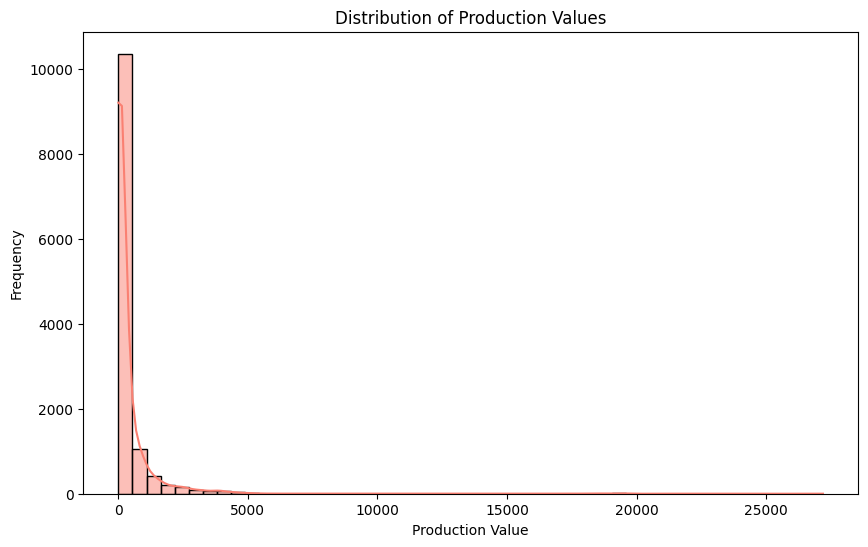

In [75]:
# Distribution of production values
plt.figure(figsize = (10, 6))
sns.histplot(df['production_value'], 
             bins = 50, 
             kde = True, 
             color = 'salmon')
plt.title('Distribution of Production Values')
plt.xlabel('Production Value')
plt.ylabel('Frequency')
plt.show()


<b>Observation:</b> Similar to the emissions distribution, the production values are also right-skewed. This indicates that most entities have lower production values, but there are some outliers with very high production values

In [76]:
df[df['production_value'] > 5000].sort_values(by = ['production_value'], ascending = False)

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
4980,1988,Former Soviet Union,Nation State,Natural Gas,27192.000000,Bcf/yr,1982.035495
4973,1987,Former Soviet Union,Nation State,Natural Gas,25357.990000,Bcf/yr,1848.353790
4966,1986,Former Soviet Union,Nation State,Natural Gas,24194.990000,Bcf/yr,1763.582266
5007,1990,Gazprom,State-owned Entity,Natural Gas,23307.119230,Bcf/yr,1698.865019
5009,1991,Gazprom,State-owned Entity,Natural Gas,23178.364040,Bcf/yr,1689.480003
...,...,...,...,...,...,...,...
4419,1973,ExxonMobil,Investor-owned Company,Natural Gas,5131.310941,Bcf/yr,374.023258
4840,1966,Former Soviet Union,Nation State,Natural Gas,5110.008000,Bcf/yr,372.470478
10990,2021,Sonatrach,State-owned Entity,Natural Gas,5096.253964,Bcf/yr,371.467941
4425,1975,ExxonMobil,Investor-owned Company,Natural Gas,5047.787376,Bcf/yr,367.935192


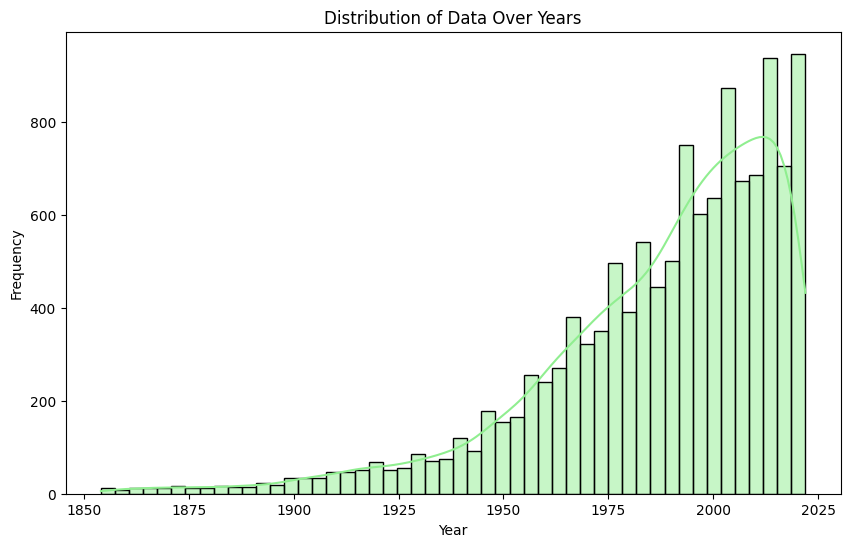

In [77]:
# Distribution of years
plt.figure(figsize = (10, 6))
sns.histplot(df['year'], 
             bins = 50, 
             kde = True, 
             color = 'lightgreen')
plt.title('Distribution of Data Over Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

<b>Observation:</b> The distribution of years is more towards the present decades, with higher frequency of records from the late 20th century onwards, reflecting increased industrial activity and bettter record-keeping

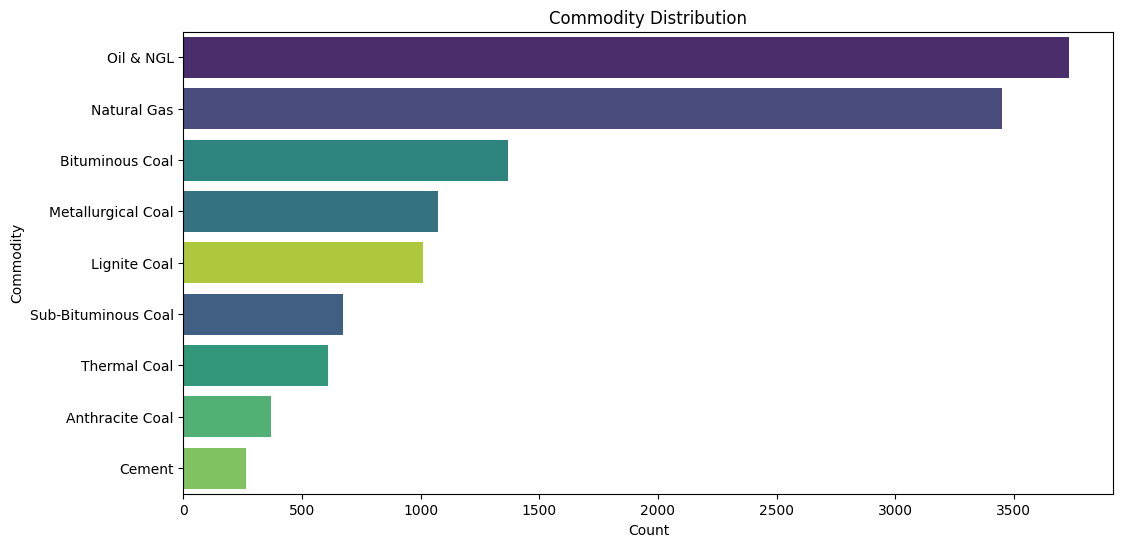

In [78]:
# Count plot for commodities
plt.figure(figsize = (12, 6))
sns.countplot(y = 'commodity', 
              data = df, 
              order = df['commodity'].value_counts().index, 
              palette = "viridis", 
              hue = 'commodity')
plt.title('Commodity Distribution')
plt.xlabel('Count')
plt.ylabel('Commodity')
plt.show()


<b>Observation:</b> The distribution of commodities show that "Oil & NGL" is the most common commodity, followed by "Natural Gas". This aligns well with the global energy mix, where oil and gas are dominant energy sources.

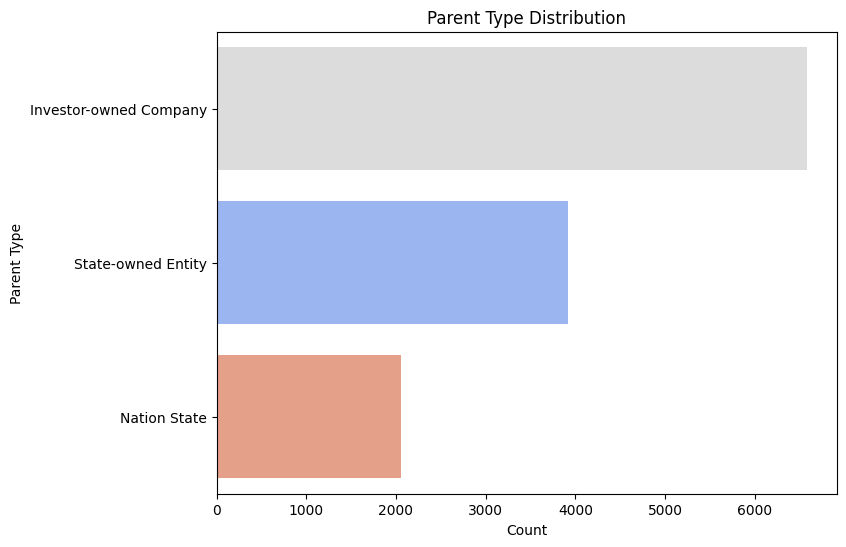

In [79]:
# Count plot for parent types
plt.figure(figsize = (8, 6))
sns.countplot(y ='parent_type', 
              data = df, 
              order = df['parent_type'].value_counts().index, 
              palette = "coolwarm", 
              hue = 'parent_type')
plt.title('Parent Type Distribution')
plt.xlabel('Count')
plt.ylabel('Parent Type')
plt.show()


The parent type distribution show that "Investor-owned Company" is the most common parent type, followed by "State-owned Entity". This indicates that significant emission contributions are from privately-run entities.

## Bivariate Analysis

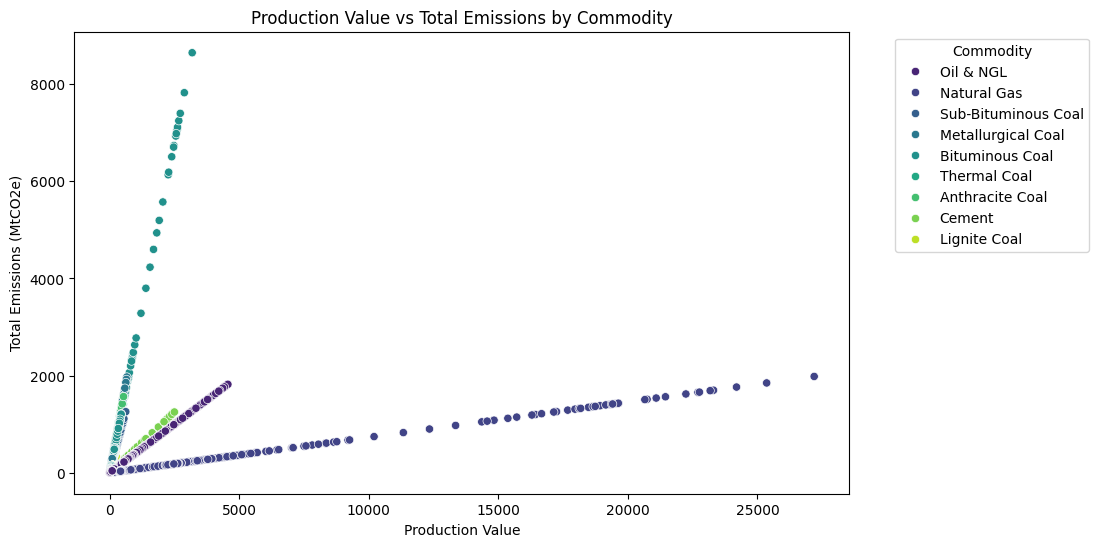

In [80]:
# Relationship between Production Value and Total Emissions
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'production_value', 
                y = 'total_emissions_MtCO2e', 
                hue = 'commodity', 
                data = df, 
                palette = 'viridis')
plt.title('Production Value vs Total Emissions by Commodity')
plt.xlabel('Production Value')
plt.ylabel('Total Emissions (MtCO2e)')
plt.legend(title = 'Commodity', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()


The scatter plot shows a positive correlation. As production increaes, emissions tend to rise, which is expected as high production often involves more energy consumption and hence more emissions. However, the strength of this correlation varies by commodity.

Oil and natural gas production generally results in higher emissions compared to other commodities. This is likely due to the energy-intensive process involved in extracting and processing these fossil fuels.

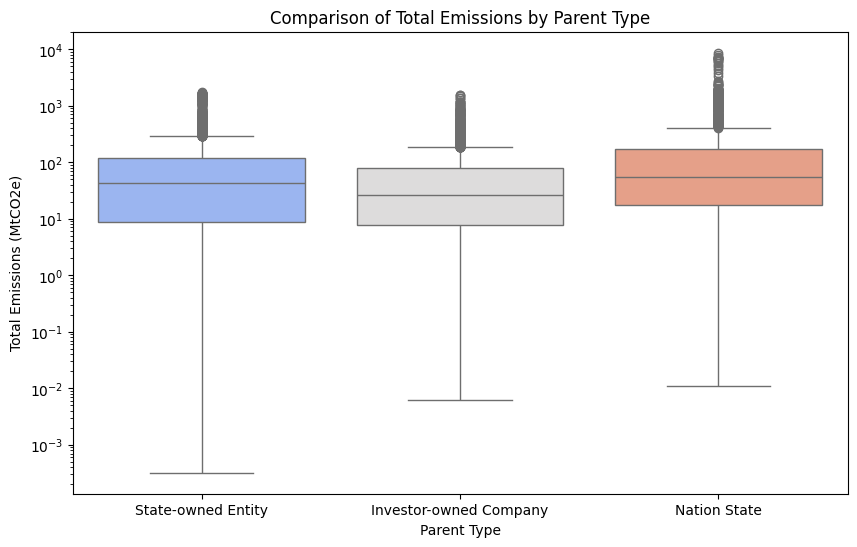

In [81]:
# Comparison of Emissions by Parent Type
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'parent_type', 
            y = 'total_emissions_MtCO2e', 
            data = df, 
            palette = 'coolwarm', 
            hue = 'parent_type')
plt.title('Comparison of Total Emissions by Parent Type')
plt.xlabel('Parent Type')
plt.ylabel('Total Emissions (MtCO2e)')
plt.yscale('log')  # Log scale to handle skewness
plt.show()


The box plot comparing emissions by parent type reveals that state-owned entities generally have higher emissions compared to investor-owned entities. This could be due to the large scale of operations typically associated with state-owned enterprises, particularly in countries where the energy sector is government-controlled.

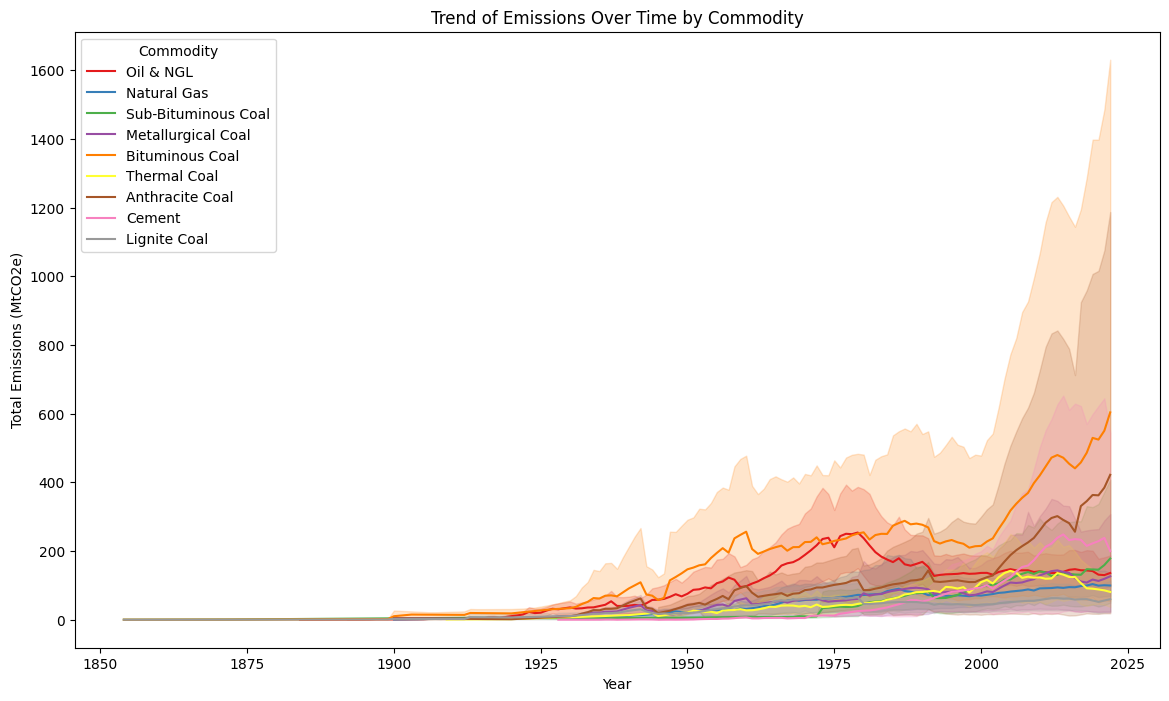

In [82]:
# Time Series Analysis
plt.figure(figsize = (14, 8))
sns.lineplot(x = 'year', 
             y = 'total_emissions_MtCO2e', 
             hue = 'commodity', 
             data = df, 
             palette = 'Set1')
plt.title('Trend of Emissions Over Time by Commodity')
plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO2e)')
plt.legend(title = 'Commodity')
plt.show()


<b>Observation:</b>

The time series analysis are showing three insights:

1. Increasing trend in Emissions over time:
    * Emissions have generally increased over the years, especially during the industrial boom in the late 20th century. This aligns well with the global industrialisation, urbanisation and increased energy demand.
    * There are noticable spikes in emissions during specific periods, possibly correlating with increased production or lack of stringent environmental regulations during those times.
2. Impacts of Global Events:
    * Fluctuations in emissions could correspond to global events such as economic recessions, oil crises, or the implementation of significant environmental policies (e.g., the Kyto Protocol in the late 1990s). These events can temporarily reduce emissions due to decreased production or enforce stricter controls on industrial emissions.
3. Commodity specific trends
    * Some commodities show different trends over time. For example, emissions from coal might have peaked earlier, reflecting the global shift away from coal toward cleaner energy sources. In contrast, emissions from natural gas may have increased as it was adopted as a 'bridge fuel' in the transition away from coal.

# Recommendations:

1. Target High-Emission Entities with Tailored Policies
    * **Focus:** Prioritise regulatory efforts on the top emitters, particularly state-owned entities and those associsated with high-emission commodities like oil and natural gas.
    * **Potential Actionable Steps:**
        * Implement targeted carbon taxes or emissions trading schemes that penalise excessive emissions, while incentivising reductions.
        * Develop industry-specific guidelines that promote cleaner production methods, eg adoption or energy-efficient technologies or the transition to lower-emission fuels.
        * Encourage transparency and regular reporting from high-emission entities to monitor progress and ensure compliance with environmental standards. For example, along with an annual report release, incentivise an annual carbon emissions report
    * **Impact:** This approach addresses the most significant contributors to emissions, potentially leading to substantial reductions at the source.
2. Accelerate the Transition to Renewable Energy Sources
    * **Focus:** Shift away from fossil fuels, particularly oil, coal, and natural gas, and towards renewable energy sources such as solar, wind, and hydropower.
    * **Potential Actionable Steps:** 
        * Increase Government subsidies and incentives for renewable energy projects, making them more financially viable compared to fossil fuels.
        * Mandate renewable energy adoption targets for both state-owned and investor-owned enterprises, with clear timelines and penalties for non-compliance.
        * Invest in infracstructure improvements, such as smart grids and energy storage solutions, to support the integration of renewable energy into the existing grid.
    * **Impact:** Reducing reliance on fossil fuels lead to significant long-term reductions in emissions, helping to mitigate climate change.
3. Enhance Regulations and innovation in State-owned enterprises
    * **Focus:** Strengthen environmental regulations for state-owned enterprises, which are often responsible for substantial emissions.
    * **Potential Actionable Steps:**
        * Introduce stricter environmental performance standards specifically for state-owned entities, with regular audits to ensure adherence.
        * Encourage research and development in state-owned enterprises to pioneer and adopt clean technologies, such as carbon capture and storage or green hydrogen.
        * Promote public-privatte partnerships that leverage private sector expertise and innovation to help state-owned enterprises achieve emissions reductions.
    * **Impact:** Enhancing the environmental responsibility of state-owned enterprises can lead to substantial emissions reductions, given their significant operatitonal scale.
4. Develop Commodity-Specific Emissions Reduction Strategies
    * **Focus:** Create tailored emissions reduction strategies based on the unique characteristics and impacts of different commodities.
    * **Potential Actionable Steps:**
        * For high-emission commodities like oil and coal, prioritise the transition to cleaner alternatives and promote practices that reduce the carbon intensity of production.
        * For natural gas, which is often seen as a transitional fuel, implement measures to minimise methane leaks and improve the efficiency of extraction and processing.
        * Encourage diversification in energy portfolios, gradually reducing dependence on high-emission commodities while expanding investments in renewables.
    * **Impact:** Commodity-specific strategies ensure that emissions reduction efforts are both effective and practical, taking into account the distinct challenges and opportunities of each sector.
5. Implement Continuous Monitoring and Adaptive Policy Frameworks
    * **Focus:** Establish a dynamic policy environment that adapts to changes in emissions trends and global events, ensuring ongoing effectiveness.
    * **Potential Actionable Steps:**
        * Create a robust emissions monitoring system that provides real-time data on emissions trends, allowing for timely policy adjustments.
        * Develop adaptive policy frameworks that can be modified in response to new technological advancements, economic shifts, or changes in global energy demand.
        * Facilitate international cooperation to share best practices, technology, and data, enabling a coordinated global response to emissions reduction.
    * **Impact:** Adaptive policies ensure that emissions reduction efforts remain relevant and effective in a rapidly changing global environment, preventing stagnation and encouraging continuous improvement.